<a href="https://colab.research.google.com/github/snemmani/ml_ai/blob/master/Lab/Day2_Cybersecurity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam detection system



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('drive/MyDrive/Datasets/spam_ham_dataset.csv', index_col=0)
df.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
df.describe()

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


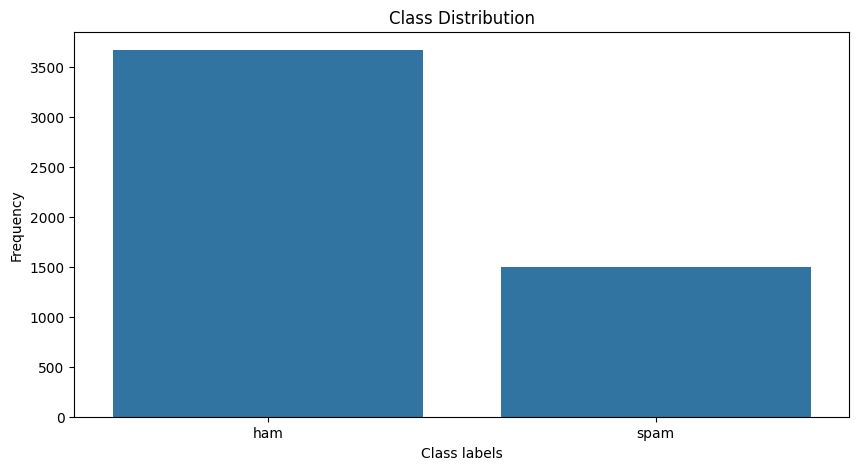

In [9]:
class_counts = df['label'].value_counts()

# Plotting class counts
plt.figure(figsize=(10, 5))
sns.barplot(x = class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.ylabel('Frequency')
plt.xlabel('Class labels')

plt.show()

# Word Frequency

In [10]:
from collections import Counter

df[df['label'] == 'ham']

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
2949,ham,Subject: ehronline web address change\r\nthis ...,0
...,...,...,...
2849,ham,"Subject: fw : crosstex energy , driscoll ranch...",0
1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0


In [11]:
df[df['label'] == 'ham']['text']

605     Subject: enron methanol ; meter # : 988291\r\n...
2349    Subject: hpl nom for january 9 , 2001\r\n( see...
3624    Subject: neon retreat\r\nho ho ho , we ' re ar...
2030    Subject: re : indian springs\r\nthis deal is t...
2949    Subject: ehronline web address change\r\nthis ...
                              ...                        
2849    Subject: fw : crosstex energy , driscoll ranch...
1518    Subject: put the 10 on the ft\r\nthe transport...
404     Subject: 3 / 4 / 2000 and following noms\r\nhp...
2933    Subject: calpine daily gas nomination\r\n>\r\n...
1409    Subject: industrial worksheets for august 2000...
Name: text, Length: 3672, dtype: object

In [12]:
def get_most_common_words(class_label, num_words, column_name, dataset):
  text = " ".join(message for message in dataset[dataset['label'] == class_label][column_name])
  words = text.lower().split()

  return Counter(words).most_common(num_words)



In [13]:
get_most_common_words("spam", 20, "text", df)

[('.', 19489),
 (',', 11227),
 ('-', 7941),
 ('the', 7254),
 ('/', 5707),
 ('to', 5160),
 ('and', 4903),
 (':', 4612),
 ('of', 4490),
 ('a', 3787),
 ('in', 3129),
 ('=', 3091),
 ('you', 2794),
 ('for', 2523),
 ('!', 2458),
 ('this', 2283),
 ('is', 2256),
 ('your', 1946),
 ('?', 1928),
 ("'", 1762)]

In [14]:
len("this is a spam email")

20

In [15]:
df['text_length'] = df['text'].apply(lambda x : len(x))

df.head()

,label,text,label_num,text_length
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [16]:
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,3672.0,977.008170,1382.827493,18.0,231.75,530.0,1227.25,32258.0
spam,1499.0,1223.256171,1825.986210,11.0,283.00,576.0,1253.50,22073.0


In [17]:
import string

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
def preprocess_text(text) :
  text = text.lower()

  text = text.translate(str.maketrans('', '', string.punctuation))

  words = text.split()

  words = [word for word in words if word not in ENGLISH_STOP_WORDS]

  text = " ".join(words)

  return text

In [20]:
df["text"].values[0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

# Now use the same logic to convert the text below

In [21]:
preprocess_text(df["text"].values[0])

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminary flow data provided daren override pop s daily volume presently zero reflect daily activity obtain gas control change needed asap economics purposes'

In [22]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,label_num,text_length,cleaned_text
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [23]:
ham_words = get_most_common_words("ham", 20, "cleaned_text", df)
spam_words = get_most_common_words("spam", 20, "cleaned_text", df)

In [24]:
spam_words

[('subject', 1657),
 ('s', 1316),
 ('3', 1239),
 ('com', 992),
 ('http', 983),
 ('2', 858),
 ('company', 728),
 ('1', 720),
 ('0', 698),
 ('e', 631),
 ('www', 587),
 ('00', 585),
 ('information', 520),
 ('font', 515),
 ('5', 510),
 ('td', 504),
 ('t', 502),
 ('4', 494),
 ('statements', 476),
 ('email', 474)]

In [25]:
ham_words

[('ect', 13897),
 ('hou', 7281),
 ('enron', 6555),
 ('subject', 6403),
 ('2000', 4308),
 ('gas', 2861),
 ('deal', 2789),
 ('com', 2717),
 ('meter', 2459),
 ('cc', 2359),
 ('pm', 2325),
 ('hpl', 2318),
 ('s', 2111),
 ('2001', 2024),
 ('1', 2023),
 ('daren', 1901),
 ('000', 1880),
 ('00', 1819),
 ('10', 1815),
 ('thanks', 1813)]

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

In [27]:
y = df['label_num']

# Train and test the system

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
preds = knn.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.8009661835748793

In [33]:
sum(y_test.values == preds)/len(preds)

0.8009661835748793

# Trying Random Forests Noe

In [34]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
preds = rfc.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.9768115942028985

In [39]:
sum(y_test.values == preds)/len(preds)

0.9768115942028985

In [72]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=3, shuffle=True)

for i, (train_index, test_index) in enumerate(skfold.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")
  rfc = RandomForestClassifier()
  rfc.fit(X[train_index], y[train_index])
  preds = rfc.predict(X[test_index])
  print(f"  Random ForestAccuracy score is: {accuracy_score(y[test_index], preds)}")
  knn = KNeighborsClassifier()
  knn.fit(X[train_index], y[train_index])
  preds = knn.predict(X[test_index])
  print(f"  KNN Accuracy score is: {accuracy_score(y[test_index], preds)}")

Fold 0:
  Train: index=[   0    2    3 ... 5168 5169 5170]
  Test:  index=[   1    5    6 ... 5157 5165 5166]
  Random ForestAccuracy score is: 0.6740139211136891
  KNN Accuracy score is: 0.6693735498839907
Fold 1:
  Train: index=[   1    2    5 ... 5165 5166 5170]
  Test:  index=[   0    3    4 ... 5167 5168 5169]
  Random ForestAccuracy score is: 0.6728538283062645
  KNN Accuracy score is: 0.6716937354988399
Fold 2:
  Train: index=[   0    1    3 ... 5167 5168 5169]
  Test:  index=[   2    9   10 ... 5162 5164 5170]
  Random ForestAccuracy score is: 0.690075449796866
  KNN Accuracy score is: 0.6749854904236796


'deprecated'

# Using Gen AI

In [45]:
! pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


In [57]:
import textwrap as tr
import cohere
from google.colab import userdata

COHERE_API_KEY = userdata.get('COHERE_API_KEY')
co = cohere.Client(COHERE_API_KEY)

response = co.generate(
    prompt = "Act as a spam detection algorithm for an email classification task. Classify the following message as spam or ham. " + "Free Money! Click hre to claim the prize.",
    max_tokens = 300,
    temperature=0.2,
    stop_sequences=["\n"]
)

output = response.generations[0].text

output = tr.fill(output, width=60)

print(output)

 Spam.


In [59]:
response = co.chat(
    preamble = "Act as a spam detection algorithm for an email classification task. Classify the following message as spam or ham. ",
    message = "Free Money! Click hre to claim the prize.",
    max_tokens = 300,
    temperature=0.2,
    stop_sequences=["\n"]
)

output = response.text

output = tr.fill(output, width=60)

print(output)

Spam.


In [63]:
preamble = "Act as a spam detection algorithm for an email classification task. Classify the following message as spam or ham. "

def classify_message(message):
  response = co.chat(
    preamble = preamble,
    message = message,
    max_tokens = 200,
    temperature=0.2,
    stop_sequences=["\n"]
  )
  return response.text


classify_message("Your academic fees is pending for Year 2024-26")

'This message is classified as spam.'

In [65]:
df['text'].values[10]

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [66]:
classify_message(df['text'].values[10])

'Spam'

In [67]:
df.head()

,label,text,label_num,text_length,cleaned_text
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,subject enron methanol meter 988291 follow not...
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,subject hpl nom january 9 2001 attached file h...
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,subject neon retreat ho ho ho wonderful time y...
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,subject photoshop windows office cheap main tr...
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,subject indian springs deal book teco pvr reve...


In [69]:
classify_message(df.iloc[605]['text'])

'Ham.'

# Markov chain principle

In [77]:
! pip install markovify

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 2.5 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18608 sha256=e6d40cf3ee30e728fefb729df853a78ab8eb7f87b803f0bbd9eeb20be6f3ceba
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


In [78]:
import markovify

In [79]:
df = pd.read_csv('drive/MyDrive/Datasets/airport_reviews.csv')

In [80]:
df.head()

,content
0,The airport is certainly tiny! Arriving there ...
1,Small airports are generally intimate friendly...
2,Waited an hour in a corridor for baggage but o...
3,The previous comment is so off the mark it mus...
4,The airport resulbles a shack. A very bad cafe...


In [81]:
from itertools import chain

N =100

review_subset = df['content'][0:N]

text = "".join(chain.from_iterable(review_subset))

In [82]:
text

'The airport is certainly tiny! Arriving there was good off the plane quick straight onto a connecting bus to Brussels. Staff at the information stand were helpful & spoke English. The outbound journey wasn\'t as pleasant security was over zealous (having to remove belt watch etc) and very unfriendly. Didn\'t bother using the \'canteen\' in the cupboard (departure lounge 1) and there was a big crush fighting fellow passengers to get on the aircraft. The toilets in the lounge were filthy stinking & graffitid. Having said that for a flight that cost about the same as a pizza it\'s worth putting up with and I\'d use it again.Small airports are generally intimate friendly and welcoming. Not so with Charleroi. It is dirty seriously overcrowded at peak times and facilities are terrible. Ryanair does a good job of running a base on these facilities mind. Links to Brussels are good but that\'s really thanks to Ryanair themselves. Food is terrible and waiting areas are not so conducive to exten

In [83]:
markov_chain_model =  markovify.Text(text)


In [87]:
for i in range(5):
  print(markov_chain_model.make_sentence())

No one seemed to be unloaded on arrival but otherwise a very long walk through concourse B with onward flight to England with Brussels airlines bound to Milan was smooth.
Do something about people parking on the carousal when we were sent in the coffee bars though there are a lot and this was enforced.
Arrival is still too slow.
My connection flight to England with Brussels airport as the airport by the first train!
Good selection of shops and restaurants bit overpriced.


In [86]:
for i in range(3):
  print(markov_chain_model.make_short_sentence(140))

Didn't use the parking facilities.
I travel a lot of hand luggage cart!
The frequency of trains to and from the airport to Leuven as well fly to Antwerp and walk to the waiting is OK.
